#  Welcome to my analysis submission for the Sales Data Analyst role at Clipboard Health.
###  Below you will find the steps I have taken to come to the recommendations included in my presentation.

Import necessary packages for analysis

In [113]:
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Read in data for analysis and specify the PROVNUM column as the string data type as some entries contain at least one letter and to keep the leading zero on others

In [4]:
df = pd.read_csv(r"C:\Users\cssca\ClipboardHealth\PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding='cp1252', dtype={'PROVNUM':str})

In [5]:
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert the WorkDate column to a datetime data format to make it easier to work with

In [6]:
df['WorkDate'] = pd.to_datetime(df['WorkDate'], format='%Y%m%d')
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-01,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-02,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-03,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-04,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-05,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sum the hours worked by employees and contractors in each row and add that information as a new column for ease of analysis later

In [7]:
emp_set = {'Hrs_RNDON_emp', 'Hrs_RNadmin_emp', 'Hrs_RN_emp', 'Hrs_LPNadmin_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp', 'Hrs_NAtrn_emp', 'Hrs_MedAide_emp'}
ctr_set = {'Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr'}

In [45]:
df['ctr_hours'] = df.filter(ctr_set).sum(axis=1)
df['emp_hours'] = df.filter(emp_set).sum(axis=1)

Inspect the size of the data set and see there are 1,330,966 entries and 35 columns

In [46]:
df.shape

(1330966, 35)

Inspect the data types present

In [114]:
df.dtypes

PROVNUM                     object
PROVNAME                    object
CITY                        object
STATE                       object
COUNTY_NAME                 object
COUNTY_FIPS                  int64
CY_Qtr                      object
WorkDate            datetime64[ns]
MDScensus                    int64
Hrs_RNDON                  float64
Hrs_RNDON_emp              float64
Hrs_RNDON_ctr              float64
Hrs_RNadmin                float64
Hrs_RNadmin_emp            float64
Hrs_RNadmin_ctr            float64
Hrs_RN                     float64
Hrs_RN_emp                 float64
Hrs_RN_ctr                 float64
Hrs_LPNadmin               float64
Hrs_LPNadmin_emp           float64
Hrs_LPNadmin_ctr           float64
Hrs_LPN                    float64
Hrs_LPN_emp                float64
Hrs_LPN_ctr                float64
Hrs_CNA                    float64
Hrs_CNA_emp                float64
Hrs_CNA_ctr                float64
Hrs_NAtrn                  float64
Hrs_NAtrn_emp       

Inspect to see if there are any null values present in the data and see that none exist

In [48]:
df.isnull().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
ctr_hours           0
emp_hours           0
dtype: int64

Calculate what percentage of reported work hours is performed by employees vs contractors

In [12]:
emp_hour_count = df.filter(emp_set).sum().sum()
ctr_hour_count = df.filter(ctr_set).sum().sum()
total_hours = emp_hour_count + ctr_hour_count

In [13]:
emp_ratio = ((emp_hour_count / total_hours) * 100)
ctr_ratio = ((ctr_hour_count / total_hours) * 100)

In [14]:
print('The percentage of hours worked by employees is: ' + str(emp_ratio.round(2)) + '%')
print('The percentage of hours worked by contractors is: ' + str(ctr_ratio.round(2)) + '%')

The percentage of hours worked by employees is: 92.47%
The percentage of hours worked by contractors is: 7.53%


We can see here that most of the hours reported are done by those employed by the care facilities.

Examine how the contractor hours are distributed across the quarter to see if there are any patterns

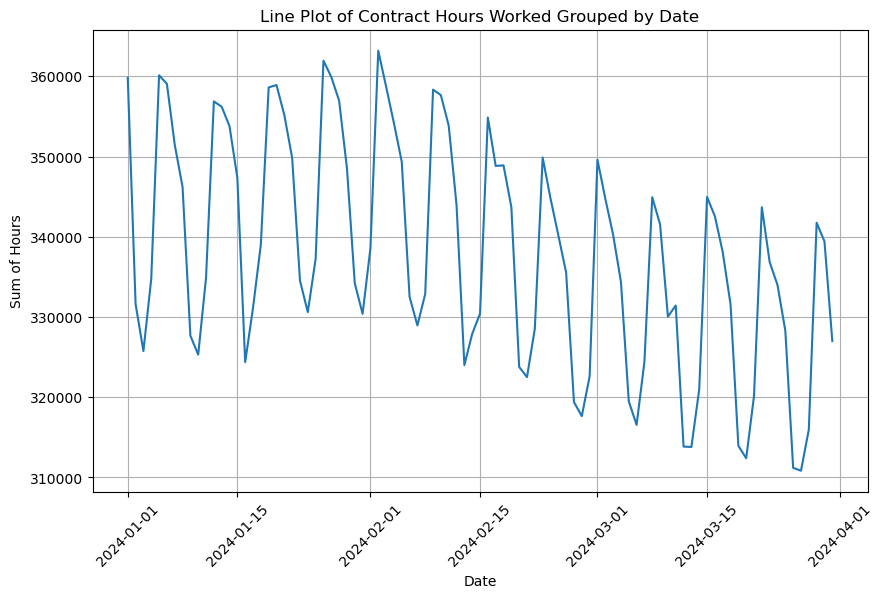

In [115]:
plot_data = df.groupby('WorkDate')['ctr_hours'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='WorkDate', y='ctr_hours')
plt.title('Line Plot of Contract Hours Worked Grouped by Date')
plt.xlabel('Date')
plt.ylabel('Sum of Hours')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can see here that the hours worked by contractors goes up and down throughout each month in the quarter and tends to overall trend downwards. Despite this, the hours are still high, never dipping below 310,000 hours total worked. It could be worth investigating what causes the spikes in hours worked in each month so we can plan accordingly for those spikes in the need for contractors.

Examine how the contractor hours are distributed across the different roles

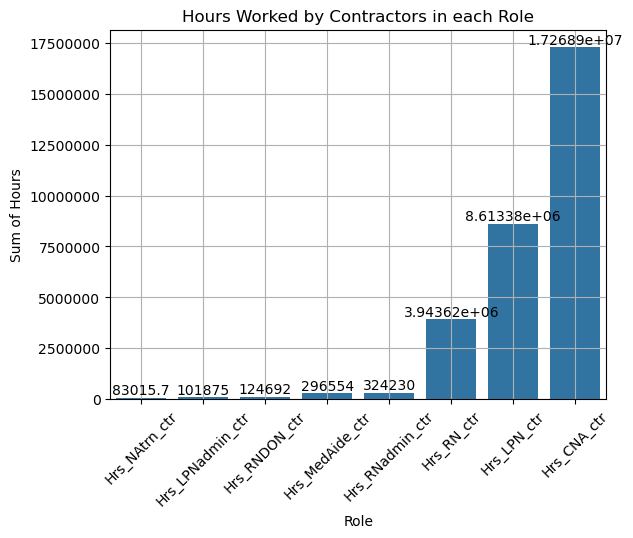

In [63]:

plot_data = df[['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']].sum(axis=0)
ax = sns.barplot(plot_data.sort_values())
ax.bar_label(ax.containers[0])
plt.title('Hours Worked by Contractors in each Role')
plt.xlabel('Role')
plt.ylabel('Sum of Hours')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.grid()
plt.show()

We can see from this chart that the most in-demand roles that care facilities need contractors for are for registers nurses (RN), licensed practical nurses (LPN), and certified nursing asssistants (CNA). Notably, the CNA role is in a much higher demand than the other roles, being at approximately double the hours of the next highest role. I would recommend focusing on hiring and staffing for these roles in particulr since they seem to be so in demand.

Let's explore what there may be to find relating to the MDScensus data.

Checking some basic summary statistics of the MDScensus data to get an idea of its scale

In [50]:
df[['MDScensus']].describe()

,MDScensus
count,1.330966e+06
mean,8.342205e+01
std,4.913768e+01
min,0.000000e+00
25%,5.100000e+01
50%,7.600000e+01
75%,1.040000e+02
max,7.430000e+02


Checking the distribution of the MDScensus data and we find it appears approximately normally distributed with a slight right skew.

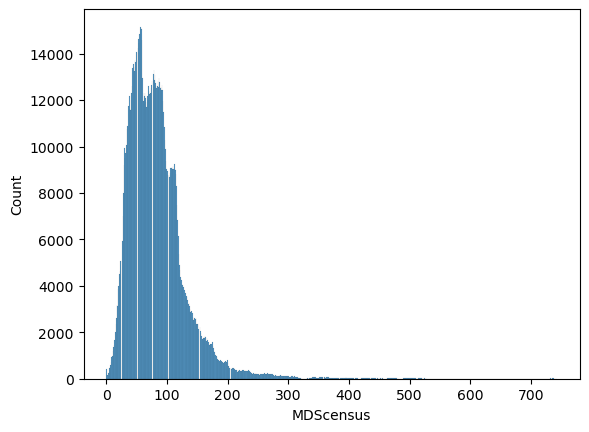

In [49]:
fig = sns.histplot(df['MDScensus'])
plt.show()

Let's look at the breakdown of which states have the highest combined MDScensus within Q12024.

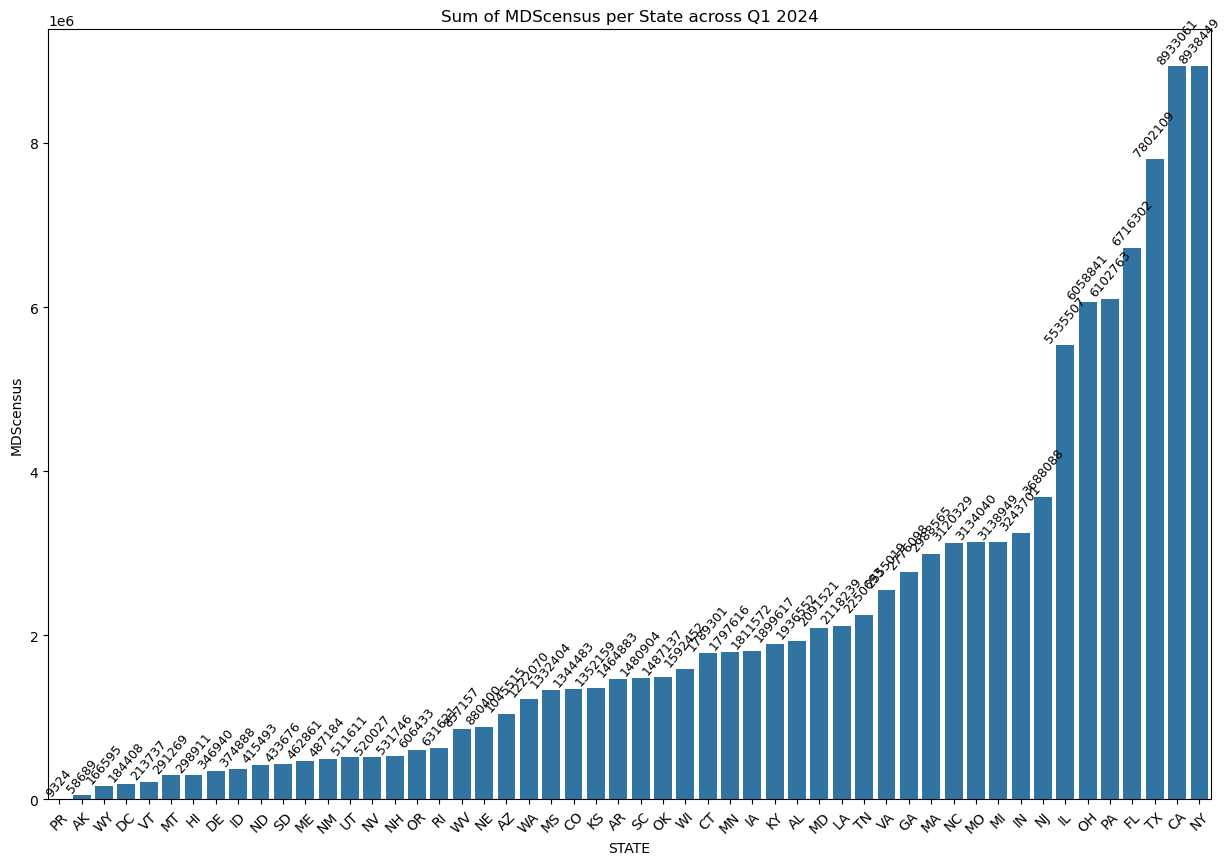

In [98]:
plot_data = df.groupby('STATE')['MDScensus'].sum().sort_values()
plt.figure(figsize=(15, 10))
ax = sns.barplot(plot_data)

# Add value labels on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position of the label (center of the bar)
            p.get_height(),  # Y position (height of the bar)
            f'{p.get_height():.0f}',  # Label text (formatted to 0 decimal places)
            ha='center',  # Horizontal alignment
            va='bottom', # Vertical alignment
            rotation=50, #Rotate label
            fontsize=9) #Label font size

plt.xticks(rotation=45)
plt.title('Sum of MDScensus per state across Q1 2024')
plt.show()

We find that there are 7 states with a notably higher MDScensus sum, indicating they tend to have more patients at their facilities that they are taking care of. This may be a good indicator that there will be a higher need for contract workers at the care facilities in these states. These 7 states are (in descending order) New York, California, Texas, Florida, Pennsylvania, Ohio, and Illinois.

Let's compare this data to the frequency that each state appears in the data when there are contractor hours.

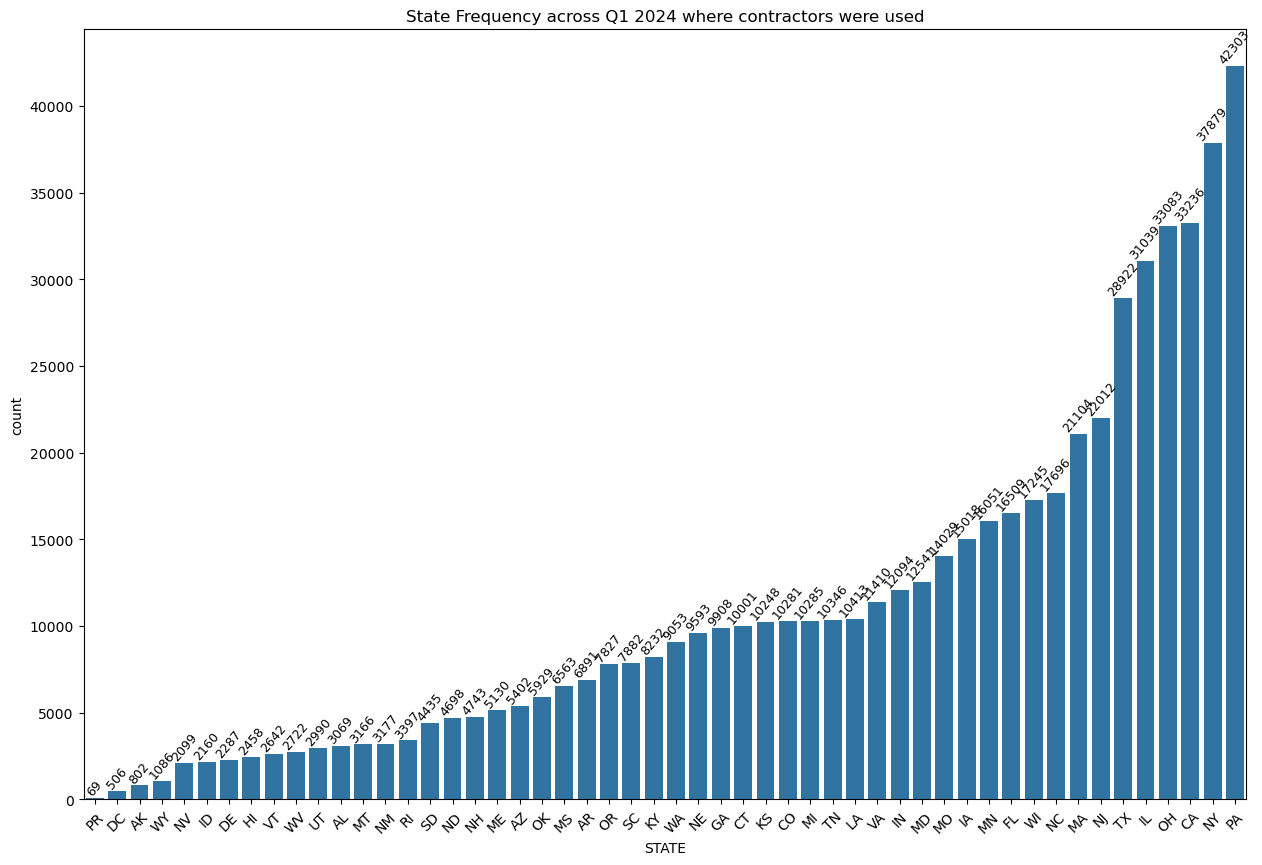

In [111]:
plt.figure(figsize=(15, 10))
filtered_df = df[df['ctr_hours'] > 0]
sorted_counts = filtered_df['STATE'].value_counts().sort_values()
ax = sns.countplot(x='STATE', data=filtered_df, order=sorted_counts.index)

# Add value labels on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position of the label (center of the bar)
            p.get_height(),  # Y position (height of the bar)
            f'{p.get_height():.0f}',  # Label text (formatted to 0 decimal places)
            ha='center',  # Horizontal alignment
            va='bottom', # Vertical alignment
            rotation=50, #Rotate label
            fontsize=9) #Label font size

plt.xticks(rotation=45)
plt.title('State Frequency across Q1 2024 where contractors were used')
plt.show()

There are 6 standout states here which are (in descending order) Pennsylvania, New York, California, Ohio, Illinois, and Texas. The only state from the previous graph not in this list is Florida, indicating they have a good amount of employee hours compared to contractor hours.

I would recommend potentially focusing on finding need for contractors in the 6 states Pennsylvania, New York, California, Ohio, Illinois, and Texas. based on these findings.